#Loading the MNIST Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
 (X_train,y_train),(X_test,y_test) = mnist.load_data( )

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

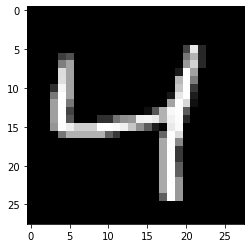

In [11]:
sample_image = X_train[2]
plt.imshow(sample_image,cmap='gray')

## Labels

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Our labels are like categories of numbers. We need to use one hot encoding so our CNN can understand it.

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [9]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Normalizing the X Data
The color values are between 0 and 255. So dividing by 255 will normalize the X_train and X_test.

In [12]:
sample_image.max()

255

In [13]:
sample_image.min()

0

In [14]:
X_train = X_train/255
X_test = X_test/255

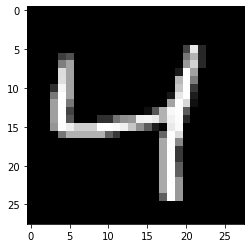

In [17]:
scaled_image = X_train[2]
plt.imshow(scaled_image,cmap='gray')

## Adding one more dimension to X to show that we are dealing with 1 RGB channel

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28)

In [19]:
X_train = X_train.reshape(60000,28,28,1)

In [22]:
X_test = X_test.reshape(10000,28,28,1)

## Training the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape = (28,28,1), activation='relu'))

model.add(MaxPool2D())

#Flatten the 28*28 images to 784
model.add(Flatten())

model.add(Dense(units=256,activation='relu'))

# 10 Categorical Outputs
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [49]:
model.fit(X_train,y_train_cat,epochs=100,callbacks=[early_stopping],validation_data=(X_test,y_test_cat))

Epoch 1/100
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0557 - val_accuracy: 0.9862
Epoch 2/100
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0500 - val_accuracy: 0.9880
Epoch 3/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0567 - val_accuracy: 0.9878
Epoch 4/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0607 - val_accuracy: 0.9875
Epoch 5/100
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0581 - val_accuracy: 0.9890


## Evaluating the model



In [50]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.006639,0.997800,0.055701,0.9862
1,0.004041,0.998817,0.050031,0.9880
2,0.005875,0.997967,0.056738,0.9878
3,0.004117,0.998750,0.060749,0.9875
4,0.004053,0.998617,0.058067,0.9890


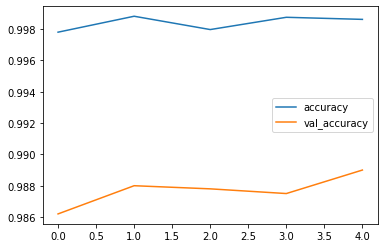

In [51]:
losses[['accuracy','val_accuracy']].plot()

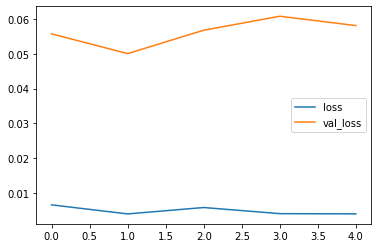

In [53]:
losses[['loss','val_loss']].plot()

In [57]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.05806668847799301, 0.9890000224113464]


In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [72]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[ 976,    1,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    0,    2,    0,    0,    1,    1,    1,    0],
       [   1,    1, 1023,    0,    0,    0,    2,    3,    2,    0],
       [   0,    0,    1, 1003,    0,    5,    0,    0,    1,    0],
       [   1,    0,    1,    0,  965,    0,    5,    0,    1,    9],
       [   1,    0,    1,    8,    0,  877,    4,    0,    1,    0],
       [   4,    2,    0,    0,    1,    1,  950,    0,    0,    0],
       [   0,    2,    7,    0,    1,    0,    0, 1013,    2,    3],
       [   3,    1,    2,    1,    0,    1,    1,    0,  963,    2],
       [   0,    1,    0,    4,    8,    1,    0,    3,    2,  990]])

In [73]:
import seaborn as sns

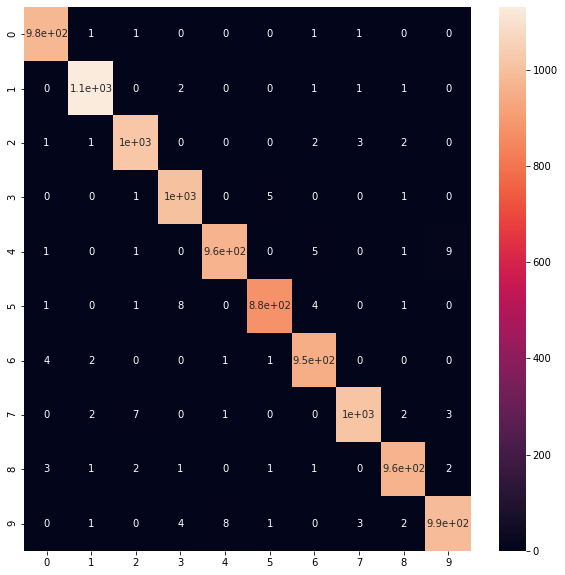

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data=conf_matrix,annot=True)